In [38]:
import numpy as np
import pandas as pd

df = pd.read_csv("./dataPreprocessed.csv", header=None)
df.iloc[:,-1] = df.iloc[:,-1].astype('int64')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,848,849,850,851,852,853,854,855,856,857
0,-0.104383,-0.774381,-0.723237,-0.728497,-0.312177,-0.841625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.110383,-0.774381,-0.723237,-0.728497,1.214743,0.825169,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.007584,0.941010,1.516077,0.370133,0.852806,1.185399,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.106987,0.369213,1.343822,0.254988,0.498189,0.719133,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.110387,-0.774381,-0.723237,-0.728497,0.883411,0.463485,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, roc_auc_score, auc, f1_score
import matplotlib.pyplot as plt
%matplotlib inline 

In [19]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=7)
model = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)
y_pred = model.predict(X_validation)
accuracy = accuracy_score(Y_validation, y_pred)

In [20]:
print('Accuracy of KNN classifier on test set: {0}\n'.format(accuracy))

Accuracy of KNN classifier on test set: 0.8799784230872966



In [21]:
print(classification_report(Y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      5570
           1       0.82      0.98      0.89      5553

    accuracy                           0.88     11123
   macro avg       0.89      0.88      0.88     11123
weighted avg       0.89      0.88      0.88     11123



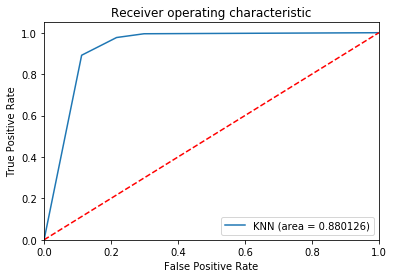

In [22]:
logit_roc_auc = roc_auc_score(Y_validation, y_pred)
fpr, tpr, thresholds = roc_curve(Y_validation, model.predict_proba(X_validation)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

Text(0.5, 1, 'KNN Classifier')

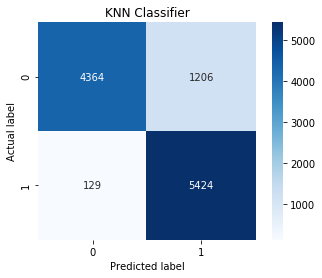

In [23]:
import seaborn as sns

sns.heatmap(confusion_matrix(Y_validation, y_pred), annot=True, fmt=".0f", square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('KNN Classifier')

In [43]:
from sklearn.decomposition import PCA

X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]

pca = PCA(n_components=10)
pca.fit(X)  
arr = pca.explained_variance_ratio_ 

sum = 0
for i in range(len(arr)):
    sum += arr[i]
    
print(sum)

0.7483554357323118


In [44]:
X = pca.transform(X)

X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,shuffle=True)

In [45]:
model = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)
y_pred = model.predict(X_validation)
accuracy = accuracy_score(Y_validation, y_pred)


In [46]:
print('Accuracy of KNN classifier after PCA on test set: {0}\n'.format(accuracy))

Accuracy of KNN classifier after PCA on test set: 0.8775510204081632

